## Importing files using numpy's genfromtxt() and how to index and slice arrays

This week we'll learn how to import files which is very handy if you have large data sets.  It's even handy if you don't want have to type in all of your data by hand if you've done your data taking in a text file for example.
Once the data is imported into an array (generally a 2D array), we'll learn how to grab the data we want to assign to our x and y variables for plotting.

Everyone download and open up the PHSX218_Week1 Jupyter notebook from Moodle or a Google Colab so that you can be ready to do some array work here in a bit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Create a couple simple arrays
#1D array
arr1 = np.array([2,4,5,6,8])
#2D array
arr2 = np.array([[1,2],[2,3],[6,8],[7,9]])

#Draw on board to show 2D array and indices [row,col]

#Indexing starts at 0, so the first element in an array is the zeroth

print(arr1[0])
print(arr2[0])

2
[1 2]


Slicing means to grab portions of the array based on what you need.

1. a[start:stop]  # items start through stop-1
2. a[start:]      # items start through the rest of the array
3. a[:stop]       # items from the beginning through stop-1
4. a[:]           # a copy of the whole array


The key point to remember is that the :stop value represents the first value that is not in the selected slice. So, the difference between stop and start is the number of elements selected.

We will not be covering "advanced" slicing techniques

In [2]:
x = arr1[0:3]
print(x)
y = arr2[1:3]
print (y)

[2 4 5]
[[2 3]
 [6 8]]


In [3]:
#We don't have to use print statements or assign to variables if 
#we just want to look at some slices
arr2[1]

array([2, 3])

In [4]:
arr2[:3]

array([[1, 2],
       [2, 3],
       [6, 8]])

In a 2D array, the indices are [row,col]  Let's look at my drawing on the whiteboard.

So then if we want to grab the entire first column of data, we can do the following:

In [5]:
x = arr2[:,0] #: for all the rows, and 0 for the zeroth column only
print (x)

[1 2 6 7]


### Head to the breakout rooms for about 5 minutes to work on the following and then we'll come back 
1. With the 2D array, assign the first column of data to a variable x, and assign the second column of data to a variable y. Print out your results
2. With the 2D array, assign the first two rows of the first column of data to a variable z and print out result. (your result should be [1,2])

In [6]:
x = arr2[:,0]
print (x)

y = arr2[:,1]
print (y)


z = arr2[:2,0]
print (z)

[1 2 6 7]
[2 3 8 9]
[1 2]


#### Let's look at importing data files and doing some plotting and analysis.  To do this we'll use Numpy's genfromtxt function.  There are a lot of options available with genfromtxt as shown in the API (Application Progamming Interface) below, which can make it seem really confusing at first, so we're going to keep it simple!

numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')

Satellites in low Earth orbit (LEO) operate between 250 and 1500 km above the ground. Because Earth's atmosphere extends hundreds of miles into space, LEOs eventually experience enough friction that they fall back to Earth and burn up. The accompanying text files gives the number of low Earth orbit satellites that reentered the Earth's atmosphere and the number of sunspots for each year since 1969. Graph the number of reentered satellites vs. the number of sunspots. Source: NASA Goddard Space Flight Center.


Look first at satellite-failures.txt file.  

In [3]:
import numpy as np
file = "satellite-failures.txt"
data = np.genfromtxt(file,skip_header=1,usecols=(1,2))
print(data)

[[105.  26.]
 [107.  25.]
 [ 66.  19.]
 [ 67.  12.]
 [ 37.  14.]
 [ 32.  21.]
 [ 14.  15.]
 [ 12.  16.]
 [ 26.  18.]
 [ 87.  33.]
 [145.  42.]
 [149.  41.]
 [146.  32.]
 [115.  19.]
 [ 65.  28.]
 [ 43.  14.]
 [ 16.  17.]
 [ 11.  16.]
 [ 29.  13.]
 [101.  33.]
 [162.  45.]
 [145.  30.]
 [144.  40.]
 [ 93.  41.]
 [ 54.  28.]
 [ 31.  17.]
 [ 18.  20.]
 [  8.  22.]
 [ 20.  21.]
 [ 62.  30.]
 [ 96.  25.]
 [124.  37.]
 [123.  41.]
 [109.  38.]
 [ 66.  31.]
 [ 43.  19.]]


In [5]:
# how big is the array?  (rows,cols) will be returned
print (data.shape)

#I want to select every row (:), but only those
#whose second index is 0. This gives us the first column
sunspots = data[:,0]

#I want to select every row, but only the second thing in each
#row, giving us our satellites data
satellites = data[:,1]

print (sunspots)
print (satellites)



(36, 2)
[105. 107.  66.  67.  37.  32.  14.  12.  26.  87. 145. 149. 146. 115.
  65.  43.  16.  11.  29. 101. 162. 145. 144.  93.  54.  31.  18.   8.
  20.  62.  96. 124. 123. 109.  66.  43.]
[26. 25. 19. 12. 14. 21. 15. 16. 18. 33. 42. 41. 32. 19. 28. 14. 17. 16.
 13. 33. 45. 30. 40. 41. 28. 17. 20. 22. 21. 30. 25. 37. 41. 38. 31. 19.]


13.952004077267041 0.1635072456826606


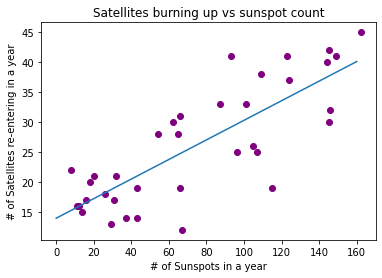

In [9]:
import numpy as np
import matplotlib.pyplot as plt

intercept, slope = np.polynomial.polynomial.polyfit(sunspots,satellites,1)

print(intercept,slope)

#create best fit line's x and y points
x = np.linspace(0,160)

#best fit line
y = slope*x + intercept

plt.xlabel("# of Sunspots in a year")
plt.ylabel("# of Satellites re-entering in a year")
plt.title("Satellites burning up vs sunspot count")
plt.scatter(sunspots,satellites,color="purple")
plt.plot(x,y)

### Predict how many satellites would burn up if there were 400 sunspots in a year.

In [ ]:
65

### Lab Assignment
Mauna Loa Observatory on the "Big Island" of Hawaii has been recording atmospheric carbon dioxide concentrations for nearly half a century beginning in the year 1958. Readings are taken continuously, but only the monthly averages are reported. Values are reported in parts per million (ppm) Construct a graph of atmospheric CO2 concentration vs. time. What two obvious behaviors are revealed in your graph? Split the data set in half, make two plots and perform a linear regression analysis on the data for the years… 1958-1987 and 1988-2017. Compare the behavior of CO2 levels in the first half of the data set to the second half. If the rate of CO2 concentration(ppm)/year continues as it has in the 1988-2017 range, what would the CO2 concentration(ppm) be in 2040?

Source: Scripps Institution of Oceanography

Use the co2-mauna-loa.txt file from Moodle.

For the Moodle quiz, there are a few questions related to the review topics, and then you'll submit a github link for your notebook. 

In [50]:
# import numpy as np
file = "co2-mauna-loa.txt"
data = np.genfromtxt(file,skip_header=2,usecols=(0,1))
print(data)

[[1958.208  315.71 ]
 [1958.292  317.45 ]
 [1958.375  317.5  ]
 ...
 [2017.792  403.63 ]
 [2017.875  405.12 ]
 [2017.958  406.81 ]]


In [39]:
# how big is the array?  (rows,cols) will be returned
print (data.shape)

#I want to select every row (:), but only those
#whose second index is 0. This gives us the first column
year = data[:,0]

#I want to select every row, but only the second thing in each
#row, giving us our satellites data
ppm = data[:,1]

print (year)
print (ppm)

(718, 2)
[1958.208 1958.292 1958.375 1958.458 1958.542 1958.625 1958.708 1958.792
 1958.875 1958.958 1959.042 1959.125 1959.208 1959.292 1959.375 1959.458
 1959.542 1959.625 1959.708 1959.792 1959.875 1959.958 1960.042 1960.125
 1960.208 1960.292 1960.375 1960.458 1960.542 1960.625 1960.708 1960.792
 1960.875 1960.958 1961.042 1961.125 1961.208 1961.292 1961.375 1961.458
 1961.542 1961.625 1961.708 1961.792 1961.875 1961.958 1962.042 1962.125
 1962.208 1962.292 1962.375 1962.458 1962.542 1962.625 1962.708 1962.792
 1962.875 1962.958 1963.042 1963.125 1963.208 1963.292 1963.375 1963.458
 1963.542 1963.625 1963.708 1963.792 1963.875 1963.958 1964.042 1964.125
 1964.208 1964.292 1964.375 1964.458 1964.542 1964.625 1964.708 1964.792
 1964.875 1964.958 1965.042 1965.125 1965.208 1965.292 1965.375 1965.458
 1965.542 1965.625 1965.708 1965.792 1965.875 1965.958 1966.042 1966.125
 1966.208 1966.292 1966.375 1966.458 1966.542 1966.625 1966.708 1966.792
 1966.875 1966.958 1967.042 1967.125 1967.

-2707.538589005506 1.5394142845450598


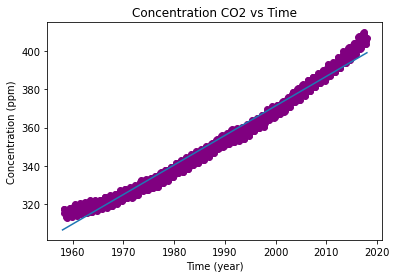

In [57]:
import numpy as np
import matplotlib.pyplot as plt

intercept, slope = np.polynomial.polynomial.polyfit(year, ppm, 1)

print(intercept,slope)

#create best fit line's x and y points
x = np.linspace(1958,2018)


#best fit line
y = slope*x + intercept

plt.xlabel("Time (year)")
plt.ylabel("Concentration (ppm)")
plt.title("Concentration CO2 vs Time")
plt.scatter(year,ppm,color="purple")
plt.plot(x,y)

From this graph we see that the CO2 concentration is rising (on average) each year. We also see that there is an acceleration to the increase of CO2 concentration.

In [53]:
# import numpy as np
file = "co2-mauna-loa.txt"
data = np.genfromtxt(file,skip_header=2,usecols=(0,1))
print(data)

[[1958.208  315.71 ]
 [1958.292  317.45 ]
 [1958.375  317.5  ]
 ...
 [2017.792  403.63 ]
 [2017.875  405.12 ]
 [2017.958  406.81 ]]


In [55]:
print (data.shape)

year1 = data[0:360,0]

ppm1 = data[0:360,1]

print (year1)
print (ppm1)

(718, 2)
[1958.208 1958.292 1958.375 1958.458 1958.542 1958.625 1958.708 1958.792
 1958.875 1958.958 1959.042 1959.125 1959.208 1959.292 1959.375 1959.458
 1959.542 1959.625 1959.708 1959.792 1959.875 1959.958 1960.042 1960.125
 1960.208 1960.292 1960.375 1960.458 1960.542 1960.625 1960.708 1960.792
 1960.875 1960.958 1961.042 1961.125 1961.208 1961.292 1961.375 1961.458
 1961.542 1961.625 1961.708 1961.792 1961.875 1961.958 1962.042 1962.125
 1962.208 1962.292 1962.375 1962.458 1962.542 1962.625 1962.708 1962.792
 1962.875 1962.958 1963.042 1963.125 1963.208 1963.292 1963.375 1963.458
 1963.542 1963.625 1963.708 1963.792 1963.875 1963.958 1964.042 1964.125
 1964.208 1964.292 1964.375 1964.458 1964.542 1964.625 1964.708 1964.792
 1964.875 1964.958 1965.042 1965.125 1965.208 1965.292 1965.375 1965.458
 1965.542 1965.625 1965.708 1965.792 1965.875 1965.958 1966.042 1966.125
 1966.208 1966.292 1966.375 1966.458 1966.542 1966.625 1966.708 1966.792
 1966.875 1966.958 1967.042 1967.125 1967.

-1999.1325090869093 1.180387818891358


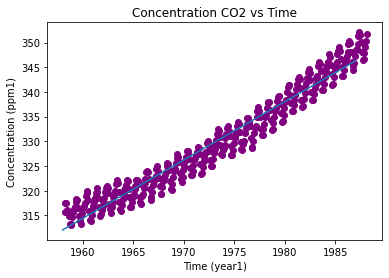

In [58]:
intercept, slope = np.polynomial.polynomial.polyfit(year1,ppm1,1)

print(intercept,slope)

#create best fit line's x and y points
x = np.linspace(1958,1987)


#best fit line
y = slope*x + intercept

plt.xlabel("Time (year1)")
plt.ylabel("Concentration (ppm1)")
plt.title("Concentration CO2 vs Time")
plt.scatter(year1,ppm1,color="purple")
plt.plot(x,y)

In [59]:
print (data.shape)

year2 = data[360:,0]

ppm2 = data[360:,1]

print (year2)
print (ppm2)

(718, 2)
[1988.208 1988.292 1988.375 1988.458 1988.542 1988.625 1988.708 1988.792
 1988.875 1988.958 1989.042 1989.125 1989.208 1989.292 1989.375 1989.458
 1989.542 1989.625 1989.708 1989.792 1989.875 1989.958 1990.042 1990.125
 1990.208 1990.292 1990.375 1990.458 1990.542 1990.625 1990.708 1990.792
 1990.875 1990.958 1991.042 1991.125 1991.208 1991.292 1991.375 1991.458
 1991.542 1991.625 1991.708 1991.792 1991.875 1991.958 1992.042 1992.125
 1992.208 1992.292 1992.375 1992.458 1992.542 1992.625 1992.708 1992.792
 1992.875 1992.958 1993.042 1993.125 1993.208 1993.292 1993.375 1993.458
 1993.542 1993.625 1993.708 1993.792 1993.875 1993.958 1994.042 1994.125
 1994.208 1994.292 1994.375 1994.458 1994.542 1994.625 1994.708 1994.792
 1994.875 1994.958 1995.042 1995.125 1995.208 1995.292 1995.375 1995.458
 1995.542 1995.625 1995.708 1995.792 1995.875 1995.958 1996.042 1996.125
 1996.208 1996.292 1996.375 1996.458 1996.542 1996.625 1996.708 1996.792
 1996.875 1996.958 1997.042 1997.125 1997.

-3428.264652116192 1.8992291252438425


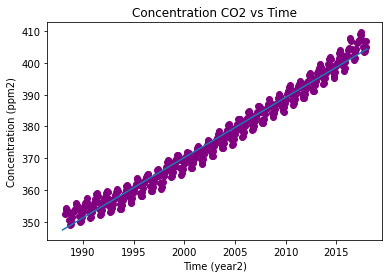

In [62]:
intercept, slope = np.polynomial.polynomial.polyfit(year2,ppm2,1)

print(intercept,slope)

#create best fit line's x and y points
x = np.linspace(1988,2018)


#best fit line
y = slope*x + intercept

plt.xlabel("Time (year2)")
plt.ylabel("Concentration (ppm2)")
plt.title("Concentration CO2 vs Time")
plt.scatter(year2,ppm2,color="purple")
plt.plot(x,y)

The slope of Concentration/Time is steeper in the second half of the data set than in the first. If the rate of the second half of the data set were to proceed at the same rate, the ppm would reach 448 ppm by 2040. This however, is an underestimate, because the graph is concave up.